<a href="https://colab.research.google.com/github/melekbairamova20/Intern-Intelligence/blob/main/InternIntelligence_Model_Hyperparameter_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bu dataset siroz qaraciyəri haqqındadır. Siroz qaraciyərinin uzun müddət zədələnməsi geniş çapıqlara səbəb olur, buna səbəb kimi hepatit və ya xroniki spirt istehlakı kimi vəziyyətlər səbəb ola bilər. Bu məlumatlar 1974-cü ildən 1984-cü ilə qədər aparılan qaraciyərin Primary Biliary Cirrhosis(PBC)-də Mayo Clinic tərəfindən yaradılmışdır.

In [5]:
import pandas as pd
cirrhosis_data = pd.read_csv('/content/cirrhosis.csv')
cirrhosis_data

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


# EDA (Explority Data Analysis)

In [6]:
cirrhosis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [7]:
cirrhosis_data.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,209.500000,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,209.500000,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,418.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


In [8]:
cirrhosis_data.dtypes

,0
ID,int64
N_Days,int64
Status,object
Drug,object
Age,int64
Sex,object
Ascites,object
Hepatomegaly,object
Spiders,object
Edema,object


In [9]:
cirrhosis_data.isna()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,True,False,False,True,True,True,False,False,True,False,True,True,True,True,False,False,False
414,False,False,False,True,False,False,True,True,True,False,False,True,False,True,True,True,True,False,False,False
415,False,False,False,True,False,False,True,True,True,False,False,True,False,True,True,True,True,False,False,False
416,False,False,False,True,False,False,True,True,True,False,False,True,False,True,True,True,True,False,False,False


In [10]:
cirrhosis_data.isna().sum()

,0
ID,0
N_Days,0
Status,0
Drug,106
Age,0
Sex,0
Ascites,106
Hepatomegaly,106
Spiders,106
Edema,0


In [11]:
cirrhosis_data.drop(columns = ['ID'], inplace = True)

In [12]:
cirrhosis_data['Age'] = (cirrhosis_data['Age']/365.25).astype(int)

In [13]:
cirrhosis_data.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,D,D-penicillamine,58,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,4500,C,D-penicillamine,56,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,1012,D,D-penicillamine,70,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,1925,D,D-penicillamine,54,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,1504,CL,Placebo,38,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [14]:
cirrhosis_data.columns

Index(['N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')

In [15]:
cirrhosis_data

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,D,D-penicillamine,58,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,4500,C,D-penicillamine,56,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,1012,D,D-penicillamine,70,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,1925,D,D-penicillamine,54,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,1504,CL,Placebo,38,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,681,D,NaN,67,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,1103,C,NaN,39,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,1055,C,NaN,56,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,691,C,NaN,58,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


# Data Understanding

In [16]:
import numpy as np
def count_outliers_iqr(df):
    outlier_counts = {}
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_count = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
        outlier_counts[column] = outlier_count
    return outlier_counts

outlier_counts = count_outliers_iqr(cirrhosis_data)

for col, count in outlier_counts.items():
    print(f"{col}: {count} Outliers")

N_Days: 0 Outliers
Age: 0 Outliers
Bilirubin: 46 Outliers
Cholesterol: 20 Outliers
Albumin: 9 Outliers
Copper: 17 Outliers
Alk_Phos: 35 Outliers
SGOT: 7 Outliers
Tryglicerides: 10 Outliers
Platelets: 6 Outliers
Prothrombin: 18 Outliers
Stage: 0 Outliers


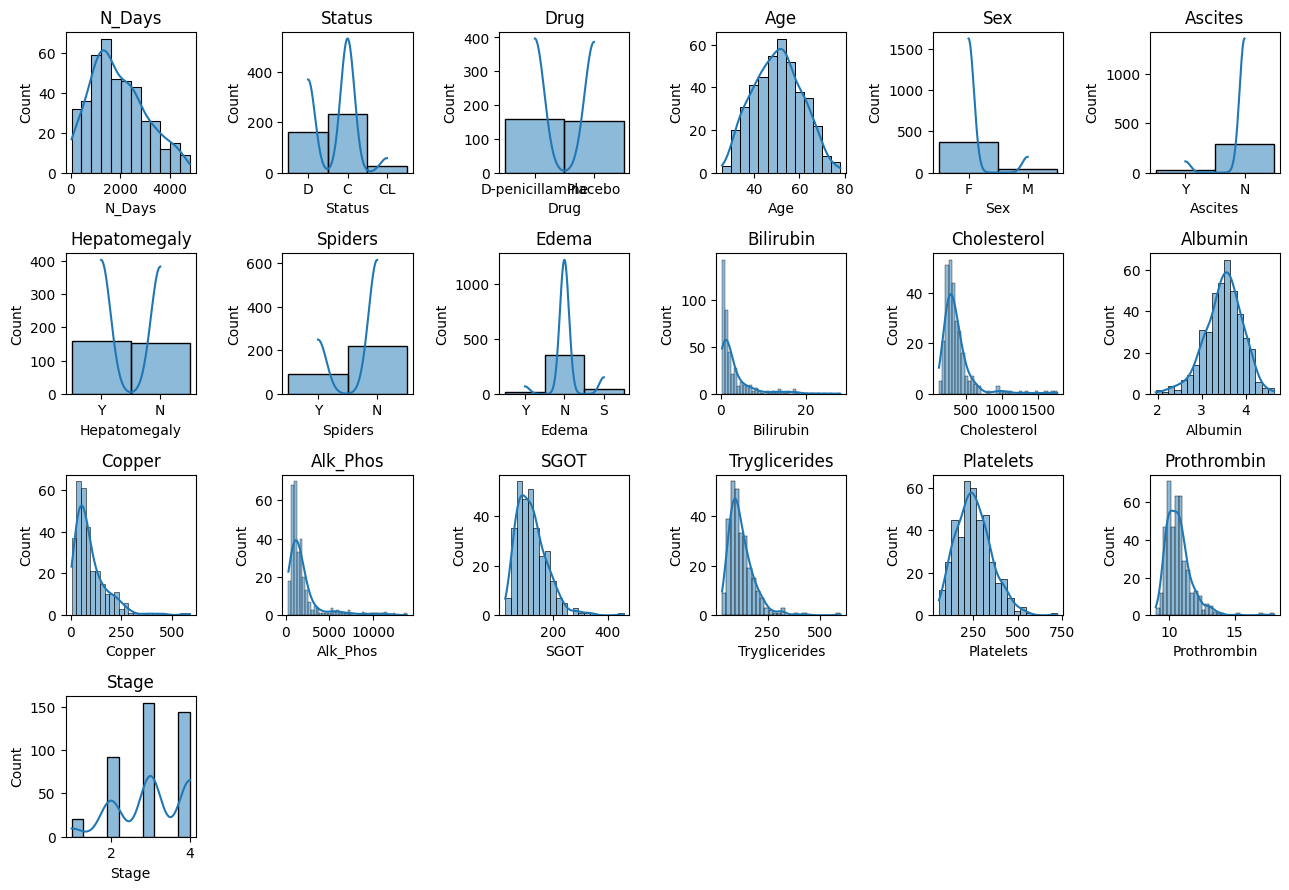

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(13, 13))
features = cirrhosis_data.columns  # Assign columns to 'features'
data = cirrhosis_data # Assign your DataFrame to 'data' for clarity

for i, feature in enumerate(features):
    plt.subplot(6, 6, i + 1)
    sns.histplot(data[feature], kde=True)
    plt.title(feature)

plt.tight_layout()
plt.show()

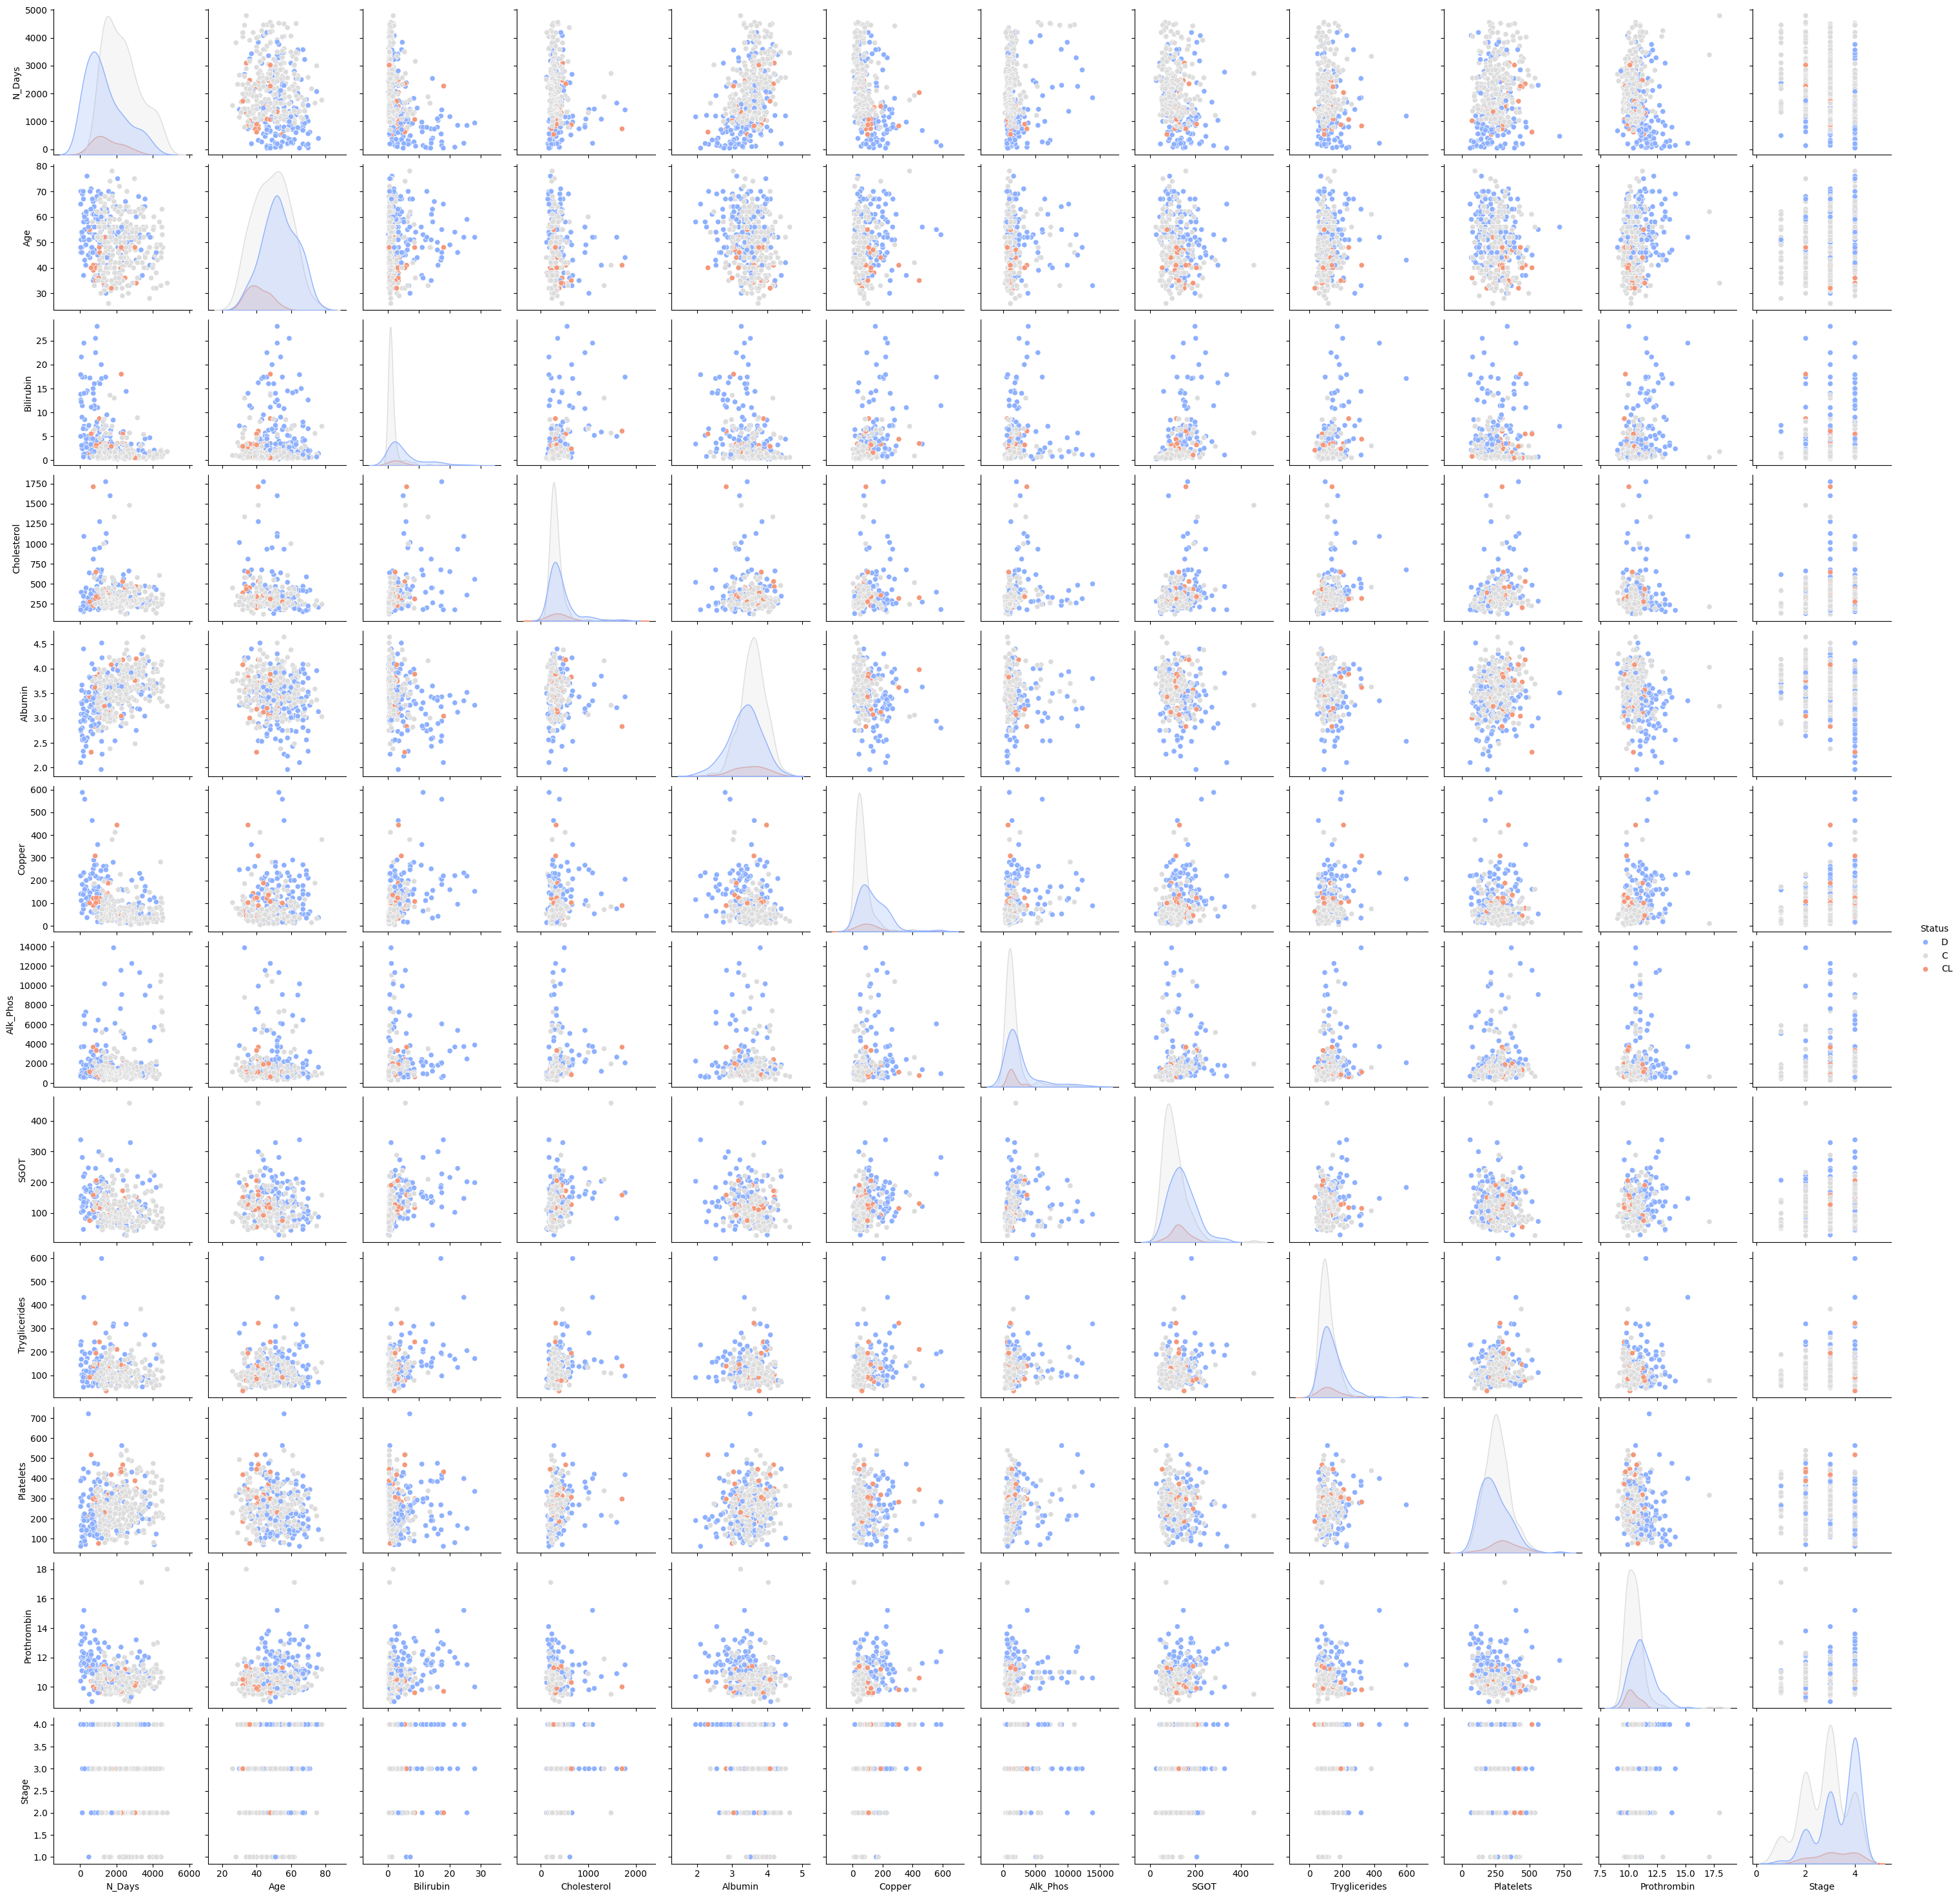

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the pairplot
sns.pairplot(cirrhosis_data, hue='Status', palette='coolwarm')

plt.show()


# Handle Missing Values

In [19]:
X = cirrhosis_data.drop('Status', axis = 1)
y = cirrhosis_data['Status'].copy()

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [21]:
import numpy as np
cat_features = X_train.select_dtypes(exclude = [np.number]).columns
num_features = X_train.select_dtypes(include = [np.number]).columns

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

cat_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy = 'most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown = 'ignore', sparse_output = False))
])

num_pipeline = Pipeline([
    ('impute', KNNImputer(n_neighbors=15, weights='uniform')),
    ('scaler', StandardScaler())
])

transformer = ColumnTransformer([
    ('num_pipeline', num_pipeline, num_features),
    ('cat_pipeline', cat_pipeline, cat_features)
], remainder = 'passthrough')

In [23]:
cat_pipeline

Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                ('onehot',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

full_pipeline = Pipeline([
    ('preprocessor', transformer),
    ('model', RandomForestClassifier(class_weight = 'balanced', random_state = 42))
])

In [25]:
full_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   KNNImputer(n_neighbors=15)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'], dtype='object'))])),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [26]:
X_train_transformed = transformer.transform(X_train)
pd.DataFrame(X_train_transformed).isnull().sum()

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


# Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
tree_pipeline = Pipeline([
    ('preprocessor', transformer),
    ('classifier', DecisionTreeClassifier(random_state = 42))
])
tree_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   KNNImputer(n_neighbors=15)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'], dtype='object'))])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [28]:
y_pred_tree = tree_pipeline.predict(X_test)


In [29]:
from sklearn.metrics import classification_report
print("Decision Tree:\n", classification_report(y_test, y_pred_tree))

Decision Tree:
               precision    recall  f1-score   support

           C       0.72      0.77      0.75        44
          CL       0.50      0.50      0.50         4
           D       0.70      0.64      0.67        36

    accuracy                           0.70        84
   macro avg       0.64      0.64      0.64        84
weighted avg       0.70      0.70      0.70        84



In [30]:
tree_score = tree_pipeline.score(X_test, y_test)
tree_score

0.7023809523809523

In [31]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred_tree, average = 'weighted')
precision

0.7014368610113292

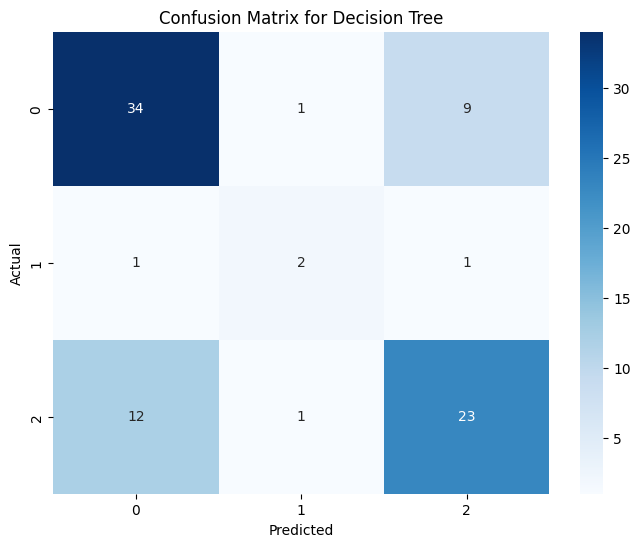

In [32]:
from sklearn.metrics import confusion_matrix

conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Logistic Regression

In [33]:
log_reg_pipeline = Pipeline([
    ('preprocessor', transformer),
    ('classifier', LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000))
])

In [34]:
log_reg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   KNNImputer(n_neighbors=15)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'], dtype='object'))])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=42))])

In [35]:
y_pred_logreg = log_reg_pipeline.predict(X_test)

In [36]:
log_score = log_reg_pipeline.score(X_test, y_test)
log_score

0.7023809523809523

In [37]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred_logreg, average = 'weighted')
precision

0.7578180259350551

In [38]:
print("Logistic Regression:\n", classification_report(y_test, y_pred_logreg))

Logistic Regression:
               precision    recall  f1-score   support

           C       0.84      0.59      0.69        44
          CL       0.20      0.50      0.29         4
           D       0.72      0.86      0.78        36

    accuracy                           0.70        84
   macro avg       0.59      0.65      0.59        84
weighted avg       0.76      0.70      0.71        84



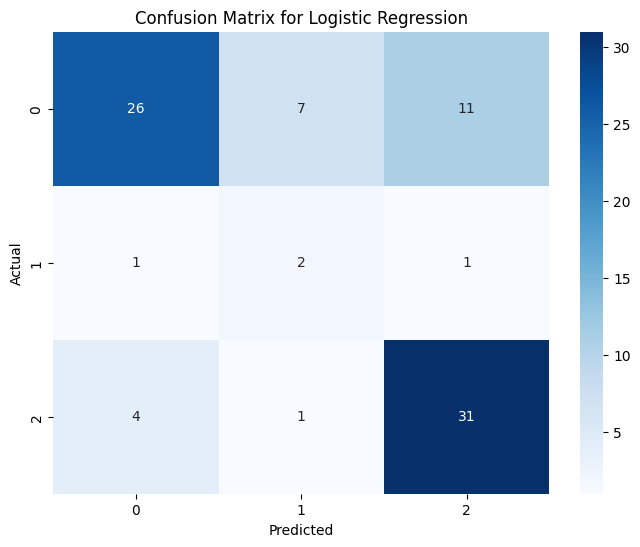

In [39]:
conf_matrix_log = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_log, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#Random Forest Classifier

In [40]:
forest_pipeline = Pipeline([
    ('preprocessor', transformer),
    ('classifier', RandomForestClassifier(n_estimators=100, max_depth=100, min_samples_split=15, class_weight='balanced', random_state=42))
])

# Modeli tren et
forest_pipeline.fit(X_train, y_train)

# Test dəstində proqnozlaşdırma et
y_pred_forest = forest_pipeline.predict(X_test)

In [41]:
forest_score = forest_pipeline.score(X_test, y_test)
forest_score

0.7976190476190477

In [42]:
print("Random Forest:\n", classification_report(y_test, y_pred_forest))

Random Forest:
               precision    recall  f1-score   support

           C       0.82      0.84      0.83        44
          CL       0.00      0.00      0.00         4
           D       0.77      0.83      0.80        36

    accuracy                           0.80        84
   macro avg       0.53      0.56      0.54        84
weighted avg       0.76      0.80      0.78        84



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


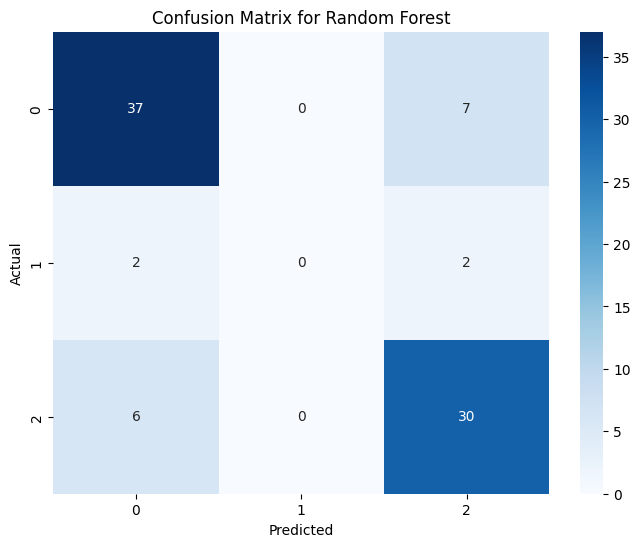

In [43]:
conf_matrix = confusion_matrix(y_test, y_pred_forest)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Support Vector Machine (SVM)

In [44]:
from sklearn.svm import SVC
linear_svm_pipeline = Pipeline([
    ('preprocessor', transformer),
    ('classifier', SVC(kernel='linear', class_weight='balanced', random_state=42))
])

# 2. RBF kernel ilə SVM
rbf_svm_pipeline = Pipeline([
    ('preprocessor', transformer),
    ('classifier', SVC(kernel='rbf', class_weight='balanced', random_state=42))
])

rbf_svm_pipeline.fit(X_train, y_train)
y_pred_rbf_svm = rbf_svm_pipeline.predict(X_test)

# Linear kernel SVM üçün model qur və nəticələri hesablamaq
linear_svm_pipeline.fit(X_train, y_train)
y_pred_linear_svm = linear_svm_pipeline.predict(X_test)

In [45]:
rbf_score = rbf_svm_pipeline.score(X_test, y_test)
rbf_score

0.75

In [46]:
linear_svm_score = linear_svm_pipeline.score(X_test, y_test)
linear_svm_score

0.7261904761904762

In [47]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred_rbf_svm, average = 'weighted')
precision

0.7778130170987313

In [48]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred_rbf_svm, average = 'weighted')
recall

0.75

In [49]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred_rbf_svm, average = 'weighted')
f1

0.75922269197123

In [50]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_rbf_svm)
accuracy

0.75

In [51]:
print("Support Vector Machine (SVM):\n", classification_report(y_test, y_pred_rbf_svm))

Support Vector Machine (SVM):
               precision    recall  f1-score   support

           C       0.84      0.70      0.77        44
          CL       0.14      0.25      0.18         4
           D       0.78      0.86      0.82        36

    accuracy                           0.75        84
   macro avg       0.59      0.61      0.59        84
weighted avg       0.78      0.75      0.76        84



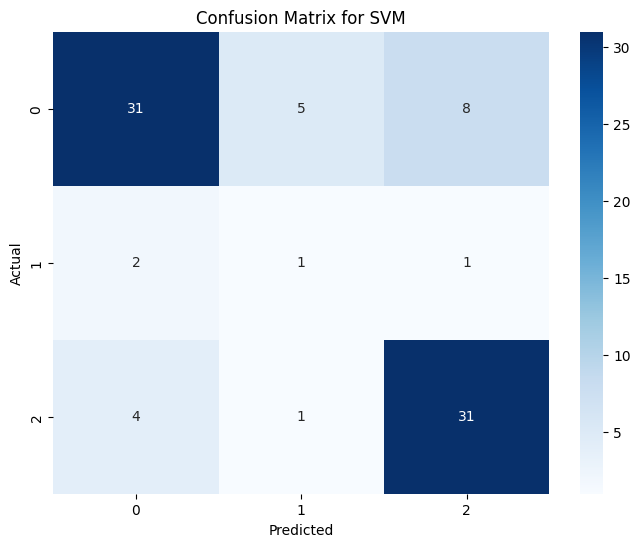

In [52]:
conf_matrix = confusion_matrix(y_test, y_pred_rbf_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [53]:
y_test.value_counts()

,count
Status,
C,44
D,36
CL,4


In [54]:
y_pred = full_pipeline.predict(X_test)

In [55]:
missing_values = np.isnan(X_train_transformed).sum()

print("Number of missing values:", missing_values)

Number of missing values: 0


# Hyperparameter Tuning

In [56]:
from sklearn.model_selection import GridSearchCV
tree_param_grid = {
    'classifier__max_depth': [3, 5, 10, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__criterion': ['gini', 'entropy']
}

tree_grid_search = GridSearchCV(tree_pipeline, param_grid=tree_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

tree_grid_search.fit(X_train, y_train)

print("\nBest Parameters for Decision Tree Classifier:")
print(tree_grid_search.best_params_)
print(f"Best Cross-Validation Accuracy: {tree_grid_search.best_score_}")

y_pred_tree_best = tree_grid_search.predict(X_test)

logreg_param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l2'],
    'classifier__solver': ['liblinear', 'saga']
}

logreg_grid_search = GridSearchCV(log_reg_pipeline, param_grid=logreg_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

logreg_grid_search.fit(X_train, y_train)

print("\nBest Parameters for Logistic Regression:")
print(logreg_grid_search.best_params_)
print(f"Best Cross-Validation Accuracy: {logreg_grid_search.best_score_}")

y_pred_logreg_best = logreg_grid_search.predict(X_test)


Best Parameters for Decision Tree Classifier:
{'classifier__criterion': 'entropy', 'classifier__max_depth': 5, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 10}
Best Cross-Validation Accuracy: 0.706422433288105

Best Parameters for Logistic Regression:
{'classifier__C': 0.01, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.7335594753505201


In [57]:
print("Logistic Regression (Best Params):\n", classification_report(y_test, y_pred_logreg_best))

Logistic Regression (Best Params):
               precision    recall  f1-score   support

           C       0.78      0.82      0.80        44
          CL       0.00      0.00      0.00         4
           D       0.78      0.81      0.79        36

    accuracy                           0.77        84
   macro avg       0.52      0.54      0.53        84
weighted avg       0.75      0.77      0.76        84



In [58]:
from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(full_pipeline, X_train, y_train, cv=5, scoring='accuracy', n_jobs = 1)
print(cross_val_scores.mean())

0.7633649932157395


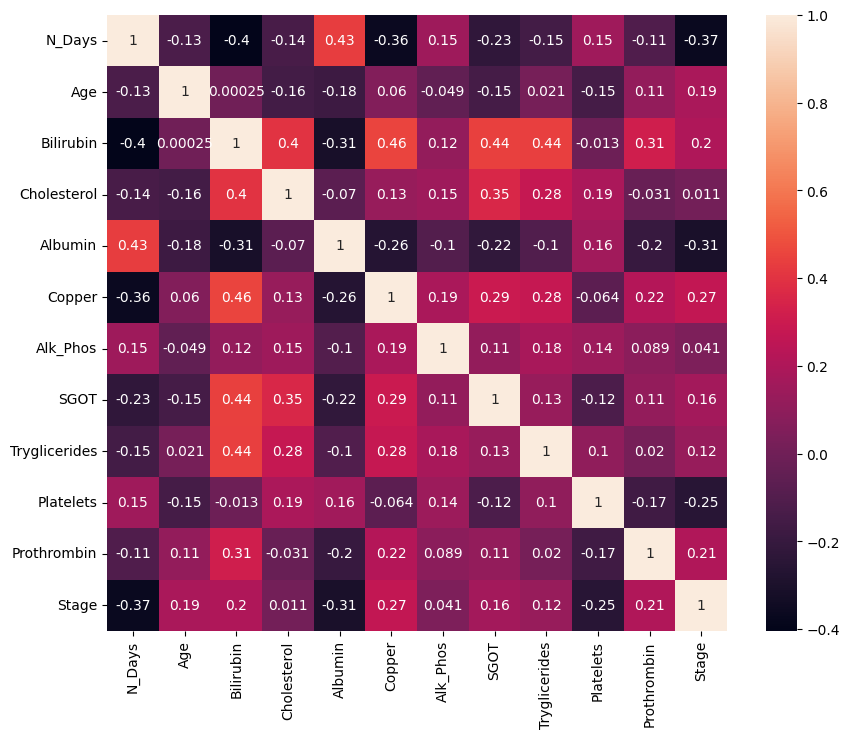

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix considering only numeric features
numeric_data = cirrhosis_data.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()

# Plot the heatmap using the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [60]:
# sns.pairplot(cirrhosis_data)

# ROC Curve

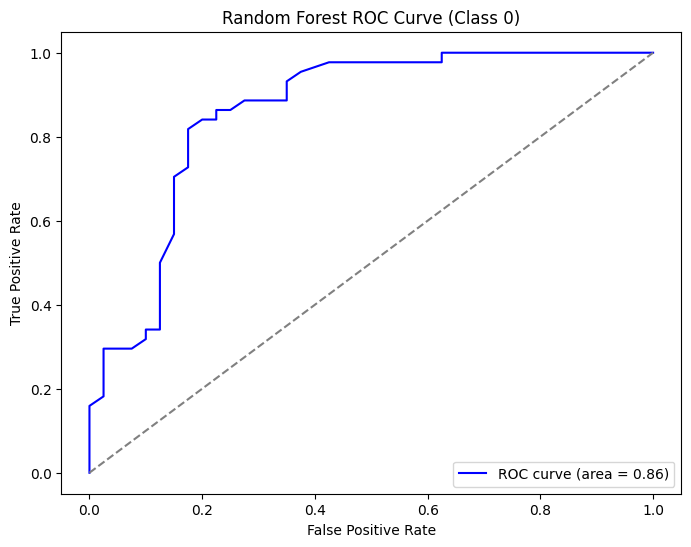

In [61]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Get probabilities for the positive class for each class
y_probs = full_pipeline.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_probs.ravel())
# Use ravel() on y_test_bin and y_probs for micro-averaging across all classes
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve for a specific class (e.g., class 0)
plt.figure(figsize=(8, 6))
plt.plot(fpr[0], tpr[0], color='b', label=f'ROC curve (area = {roc_auc[0]:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve (Class 0)')
plt.legend(loc='lower right')
plt.show()

In [62]:
cirrhosis_data['Status'].value_counts()


,count
Status,
C,232
D,161
CL,25


# Confusion Matrix

Confusion Matrix for Linear Kernel SVM:
[[28  4 12]
 [ 2  1  1]
 [ 4  0 32]]
Confusion Matrix for RBF Kernel SVM:
[[31  5  8]
 [ 2  1  1]
 [ 4  1 31]]


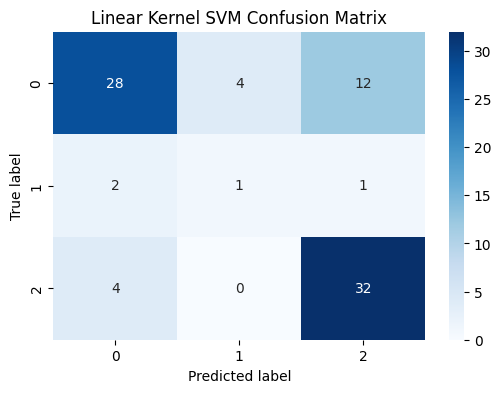

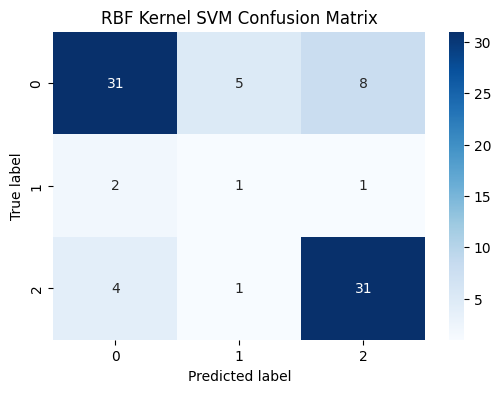

In [63]:
from sklearn.metrics import confusion_matrix

cm_linear = confusion_matrix(y_test, y_pred_linear_svm)
print("Confusion Matrix for Linear Kernel SVM:")
print(cm_linear)

# RBF kernel üçün confusion matrix
cm_rbf = confusion_matrix(y_test, y_pred_rbf_svm)
print("Confusion Matrix for RBF Kernel SVM:")
print(cm_rbf)

def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Linear kernel üçün confusion matrix-i göstər
plot_confusion_matrix(cm_linear, 'Linear Kernel SVM Confusion Matrix')

# RBF kernel üçün confusion matrix-i göstər
plot_confusion_matrix(cm_rbf, 'RBF Kernel SVM Confusion Matrix')